In [1094]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [1095]:
df=pd.read_csv("smartwatches.csv",index_col=0)

In [1096]:
df.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise        82990.0         89900.0             7.686318     4.0   
1  fire-boltt         3799.0         16999.0            77.651627     4.3   
2        boat         1999.0          7990.0            74.981227     3.8   
3  fire-boltt         1799.0         19999.0            91.004550     4.3   
4       noise         1599.0          4999.0            68.013603     4.1   

   Number OF Ratings                              Model Name Dial Shape  \
0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1            20788.0                                  BSW046        NaN   
2            21724.0                               Wave Call        NaN   
3            13244.0                                  BSW053        NaN   
4            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         NaN            NaN         NaN                  8.0       Yes   
1         NaN        Silicon         Yes                  3.5       Yes   
2         NaN        Silicon         Yes                  8.0       Yes   
3         NaN        Silicon         Yes                  3.5       Yes   
4         NaN          Other         Yes                  8.0       Yes   

  Display Size     Weight  
0          NaN  35 - 50 g  
1   1.8 inches  50 - 75 g  
2   1.7 inches  35 - 50 g  
3   1.8 inches      75g +  
4   1.7 inches  35 - 50 g

In [1097]:
df.drop_duplicates()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0         noise        82990.0         89900.0             7.686318     4.0   
1    fire-boltt         3799.0         16999.0            77.651627     4.3   
2          boat         1999.0          7990.0            74.981227     3.8   
3    fire-boltt         1799.0         19999.0            91.004550     4.3   
4         noise         1599.0          4999.0            68.013603     4.1   
..          ...            ...             ...                  ...     ...   
445  fire-boltt         5999.0          8999.0            33.337037     2.5   
446  fire-boltt         3700.0          9999.0            62.996300     NaN   
447  fire-boltt         5999.0          8999.0            33.337037     2.5   
448  fire-boltt         3200.0          7999.0            59.994999     NaN   
449  fire-boltt         3000.0          7999.0            62.495312     NaN   

     Number OF Ratings                              Model Name Dial Shape  \
0                 65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1              20788.0                                  BSW046        NaN   
2              21724.0                               Wave Call        NaN   
3              13244.0                                  BSW053        NaN   
4              13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   
..                 ...                                     ...        ...   
445                NaN                                  bsw003     Circle   
446                NaN                               beast pro     Square   
447                NaN                                  bsw003     Circle   
448                NaN                                  call 2     Square   
449                NaN                                  call 2     Square   

    Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0           NaN            NaN         NaN                  8.0       Yes   
1           NaN        Silicon         Yes                  3.5       Yes   
2           NaN        Silicon         Yes                  8.0       Yes   
3           NaN        Silicon         Yes                  3.5       Yes   
4           NaN          Other         Yes                  8.0       Yes   
..          ...            ...         ...                  ...       ...   
445        Grey        Silicon         Yes                 22.0       Yes   
446       Black        Silicon         Yes                  8.0       Yes   
447        Gold        Silicon         Yes                 22.0       Yes   
448        Blue        Silicon         Yes                 22.0       Yes   
449       Black        Silicon         Yes                 22.0       Yes   

    Display Size     Weight  
0            NaN  35 - 50 g  
1     1.8 inches  50 - 75 g  
2     1.7 inches  35 - 50 g  
3     1.8 inches      75g +  
4     1.7 inches  35 - 50 g  
..           ...        ...  
445   1.3 inches        NaN  
446   0.1 inches        NaN  
447   1.3 inches        NaN  
448   0.1 inches        NaN  
449   0.1 inches        NaN  

[440 rows x 15 columns]

In [1098]:

for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    df[column].fillna(df[column].mean(), inplace=True)
for column in df.columns:
  if pd.api.types.is_string_dtype(df[column]):
    df[column].fillna("none", inplace=True)
print(df.isna().sum()) 


Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   0
Number OF Ratings        0
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)      0
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64


In [1099]:
from sklearn.model_selection import train_test_split
test,train = train_test_split(df,test_size=0.8,random_state=42)


In [1100]:
train.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
407   zebronics         2949.0          4199.0            29.768993     3.1   
444  fire-boltt         6999.0         15999.0            56.253516     2.6   
117  fire-boltt         2499.0         11999.0            79.173264     4.1   
30         boat         1999.0          7990.0            74.981227     3.6   
415  fire-boltt         2299.0          5999.0            61.676946     2.5   

     Number OF Ratings       Model Name Dial Shape Strap Color Strap Material  \
407          10.000000  LEATHER fit-650       Oval       Black        Leather   
444       11594.726343           bsw020     Circle       Brown        Silicon   
117        1990.000000           BSW070        NaN         NaN            NaN   
30          827.000000              NaN        NaN         NaN            NaN   
415          24.000000    NINJA PRO MAX     Square        Blue        Silicon   

    Touchscreen  Battery Life (Days) Bluetooth Display Size Weight  
407         Yes            14.077392       Yes   2.7 inches    NaN  
444         Yes             8.000000       Yes   1.4 inches    NaN  
117         Yes             8.000000       Yes   1.9 inches  75g +  
30          NaN             8.000000       Yes          NaN  75g +  
415         Yes            22.000000       Yes   1.6 inches    NaN

In [1101]:
print(train.shape,test.shape)

(360, 15) (90, 15)


In [1102]:
train.isna().sum()

Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   0
Number OF Ratings        0
Model Name              30
Dial Shape             100
Strap Color            100
Strap Material          56
Touchscreen             31
Battery Life (Days)      0
Bluetooth                5
Display Size            27
Weight                 149
dtype: int64

In [1103]:
train=train.reset_index()
test=test.reset_index()

In [1104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Brand                360 non-null    object 
 2   Current Price        360 non-null    float64
 3   Original Price       360 non-null    float64
 4   Discount Percentage  360 non-null    float64
 5   Rating               360 non-null    float64
 6   Number OF Ratings    360 non-null    float64
 7   Model Name           330 non-null    object 
 8   Dial Shape           260 non-null    object 
 9   Strap Color          260 non-null    object 
 10  Strap Material       304 non-null    object 
 11  Touchscreen          329 non-null    object 
 12  Battery Life (Days)  360 non-null    float64
 13  Bluetooth            355 non-null    object 
 14  Display Size         333 non-null    object 
 15  Weight               211 non-null    obj

In [1105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Brand                360 non-null    object 
 2   Current Price        360 non-null    float64
 3   Original Price       360 non-null    float64
 4   Discount Percentage  360 non-null    float64
 5   Rating               360 non-null    float64
 6   Number OF Ratings    360 non-null    float64
 7   Model Name           330 non-null    object 
 8   Dial Shape           260 non-null    object 
 9   Strap Color          260 non-null    object 
 10  Strap Material       304 non-null    object 
 11  Touchscreen          329 non-null    object 
 12  Battery Life (Days)  360 non-null    float64
 13  Bluetooth            355 non-null    object 
 14  Display Size         333 non-null    object 
 15  Weight               211 non-null    obj

In [1106]:
numerical_data=[feature for feature in train.columns if train[feature].dtype != 'object']
continuous_data=[feature for feature in train.columns if train[feature].dtype == 'object']

In [1193]:
numerical_data.remove('index')

In [1195]:
numerical_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [1108]:
continuous_data

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

In [1109]:
train[numerical_data].describe()

index  Current Price  Original Price  Discount Percentage  \
count  360.000000     360.000000      360.000000           360.000000   
mean   222.702778   12518.264798    14444.203994            47.999143   
std    130.632905   16773.058917    14344.248209            22.689291   
min      0.000000    1199.000000     1669.000000           -79.688436   
25%    111.750000    2180.750000     5999.000000            36.601732   
50%    222.500000    3999.000000     9499.000000            48.236894   
75%    336.250000   16999.000000    14598.204244            65.006907   
max    448.000000   98990.000000    96390.000000            91.004550   

           Rating  Number OF Ratings  Battery Life (Days)  
count  360.000000         360.000000           360.000000  
mean     4.027570       10787.179682            14.173255  
std      0.553717       25791.624080             7.334818  
min      1.000000           1.000000             0.750000  
25%      3.900000          87.000000             8.000000  
50%      4.100000        1611.000000            14.077392  
75%      4.300000       11594.726343            22.000000  
max      5.000000      275607.000000            22.000000

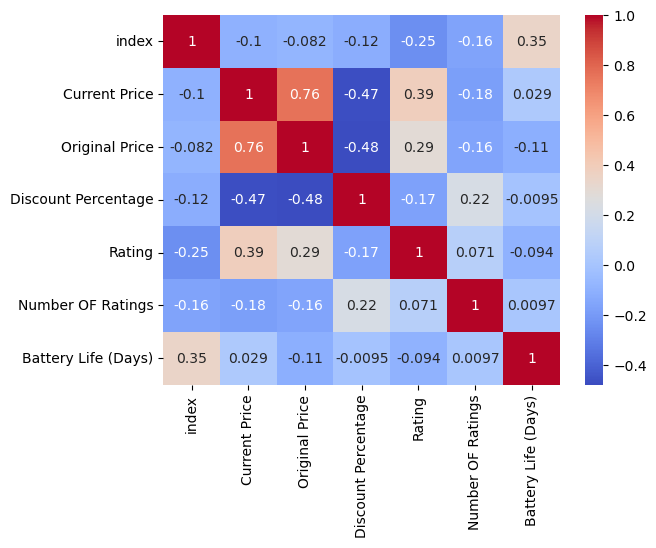

In [1110]:

correlation_matrix = train[numerical_data].corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [1111]:
train[numerical_data].corr()

index  Current Price  Original Price  \
index                1.000000      -0.099628       -0.082349   
Current Price       -0.099628       1.000000        0.760805   
Original Price      -0.082349       0.760805        1.000000   
Discount Percentage -0.120854      -0.468715       -0.479463   
Rating              -0.245369       0.387375        0.292599   
Number OF Ratings   -0.163114      -0.182566       -0.161337   
Battery Life (Days)  0.345427       0.029388       -0.112507   

                     Discount Percentage    Rating  Number OF Ratings  \
index                          -0.120854 -0.245369          -0.163114   
Current Price                  -0.468715  0.387375          -0.182566   
Original Price                 -0.479463  0.292599          -0.161337   
Discount Percentage             1.000000 -0.168384           0.222774   
Rating                         -0.168384  1.000000           0.070682   
Number OF Ratings               0.222774  0.070682           1.000000   
Battery Life (Days)            -0.009514 -0.094154           0.009712   

                     Battery Life (Days)  
index                           0.345427  
Current Price                   0.029388  
Original Price                 -0.112507  
Discount Percentage            -0.009514  
Rating                         -0.094154  
Number OF Ratings               0.009712  
Battery Life (Days)             1.000000

In [1112]:
!pip install ydata-profiling


In [1113]:
import ydata_profiling as pp

In [1114]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df[continuous_data] = imputer.fit_transform(df[continuous_data])

In [1115]:
pp.ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 23.07it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [1197]:
numerical_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

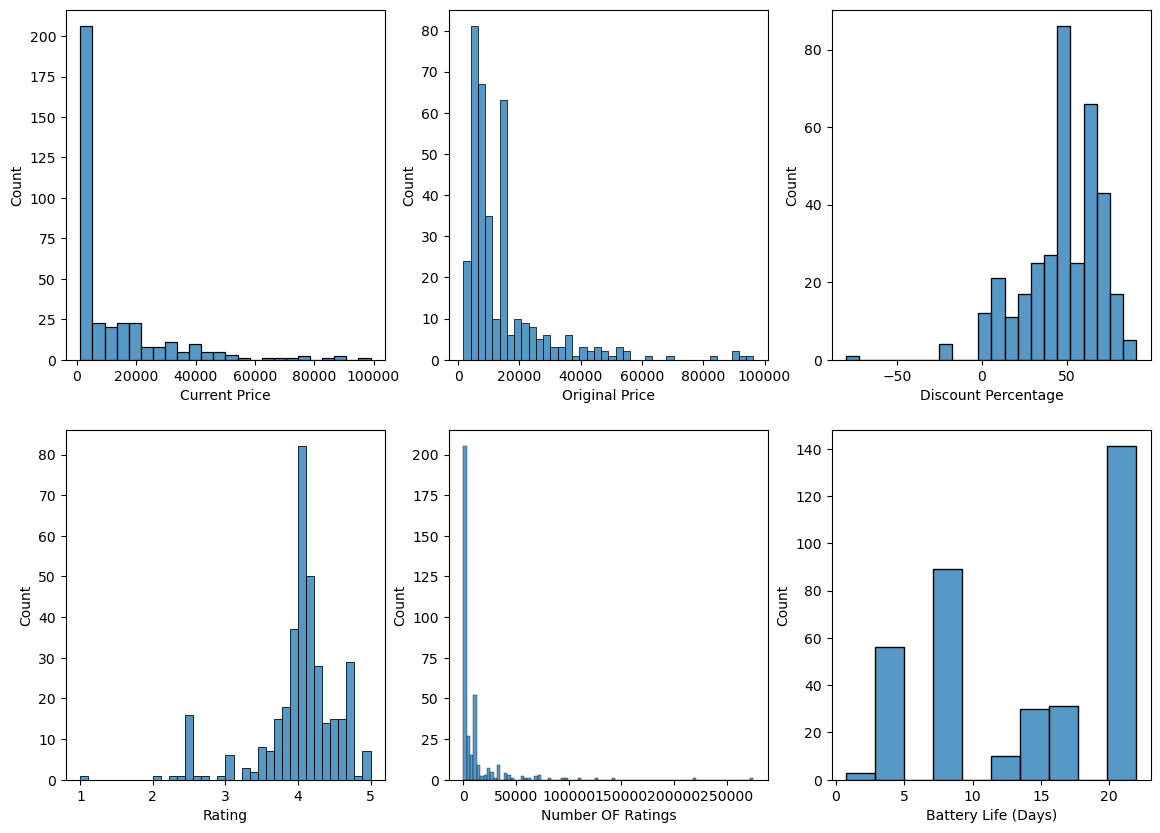

In [1199]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, column in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col] 
    sb.histplot(data=train[column], ax=ax)
plt.show()

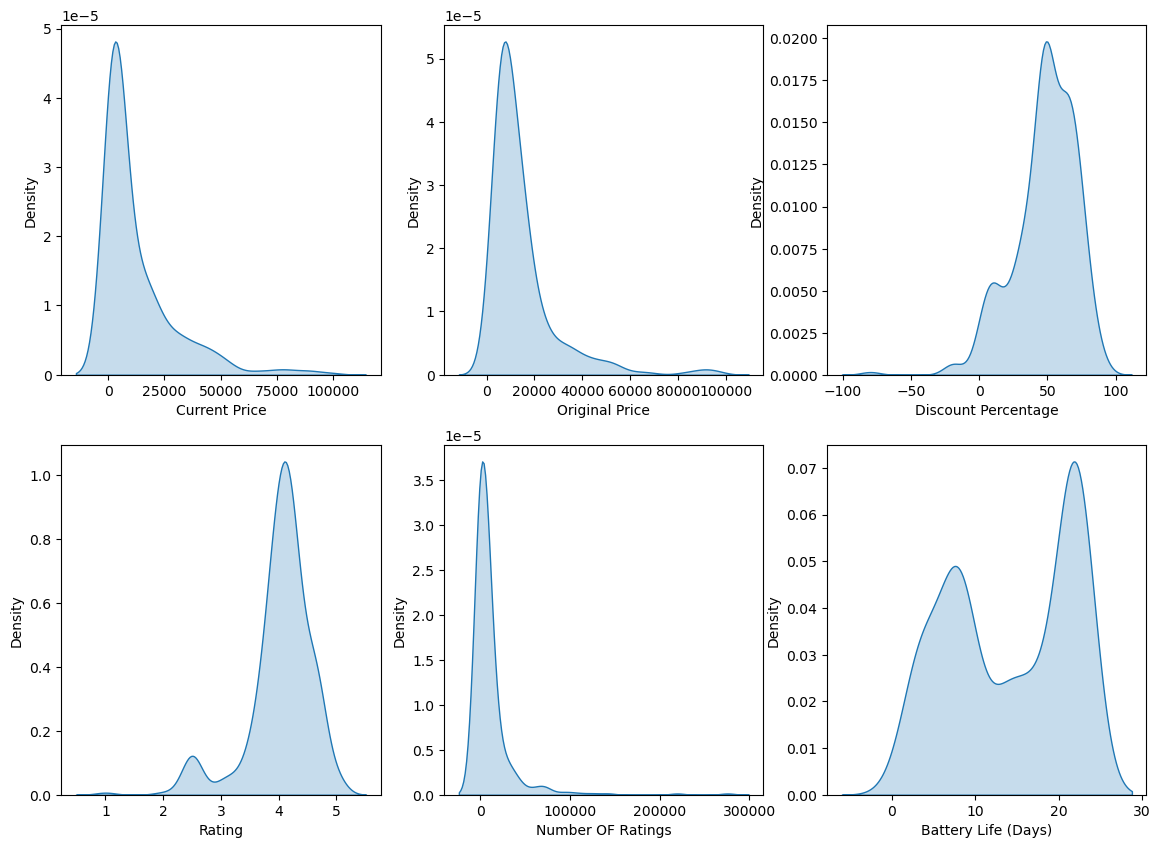

In [1201]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, column in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col] 
    sb.kdeplot(data=train[column], ax=ax,fill=True)
plt.show()

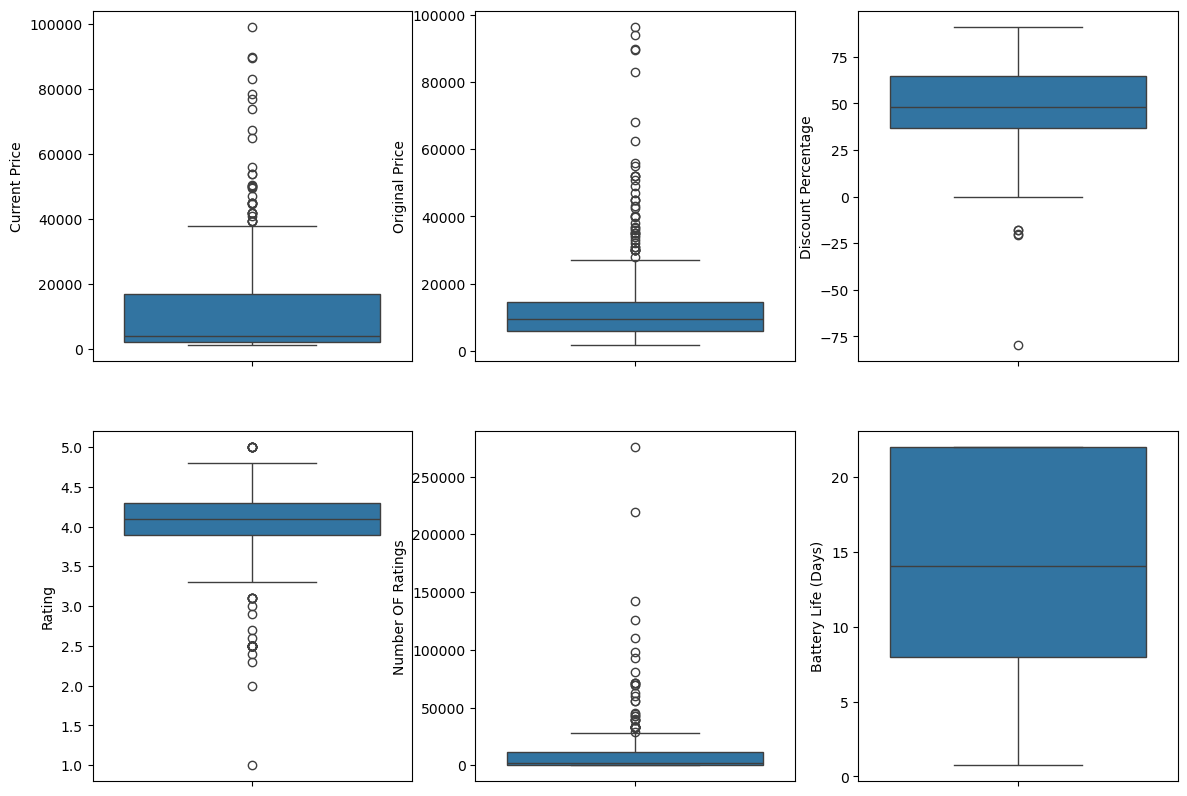

In [1203]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, column in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col] 
    sb.boxplot(data=train[column], ax=ax,fill=True)
plt.show()

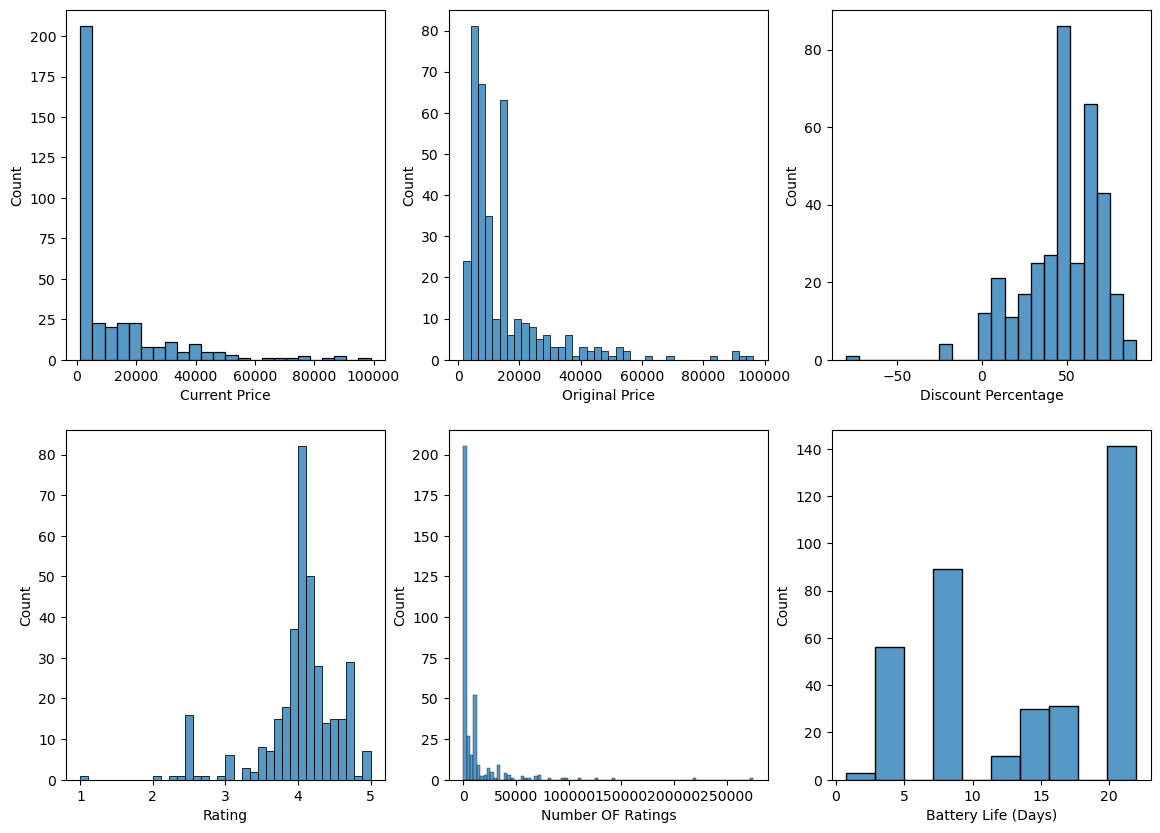

In [1205]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, column in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col] 
    sb.histplot(data=train[column], ax=ax)
plt.show()

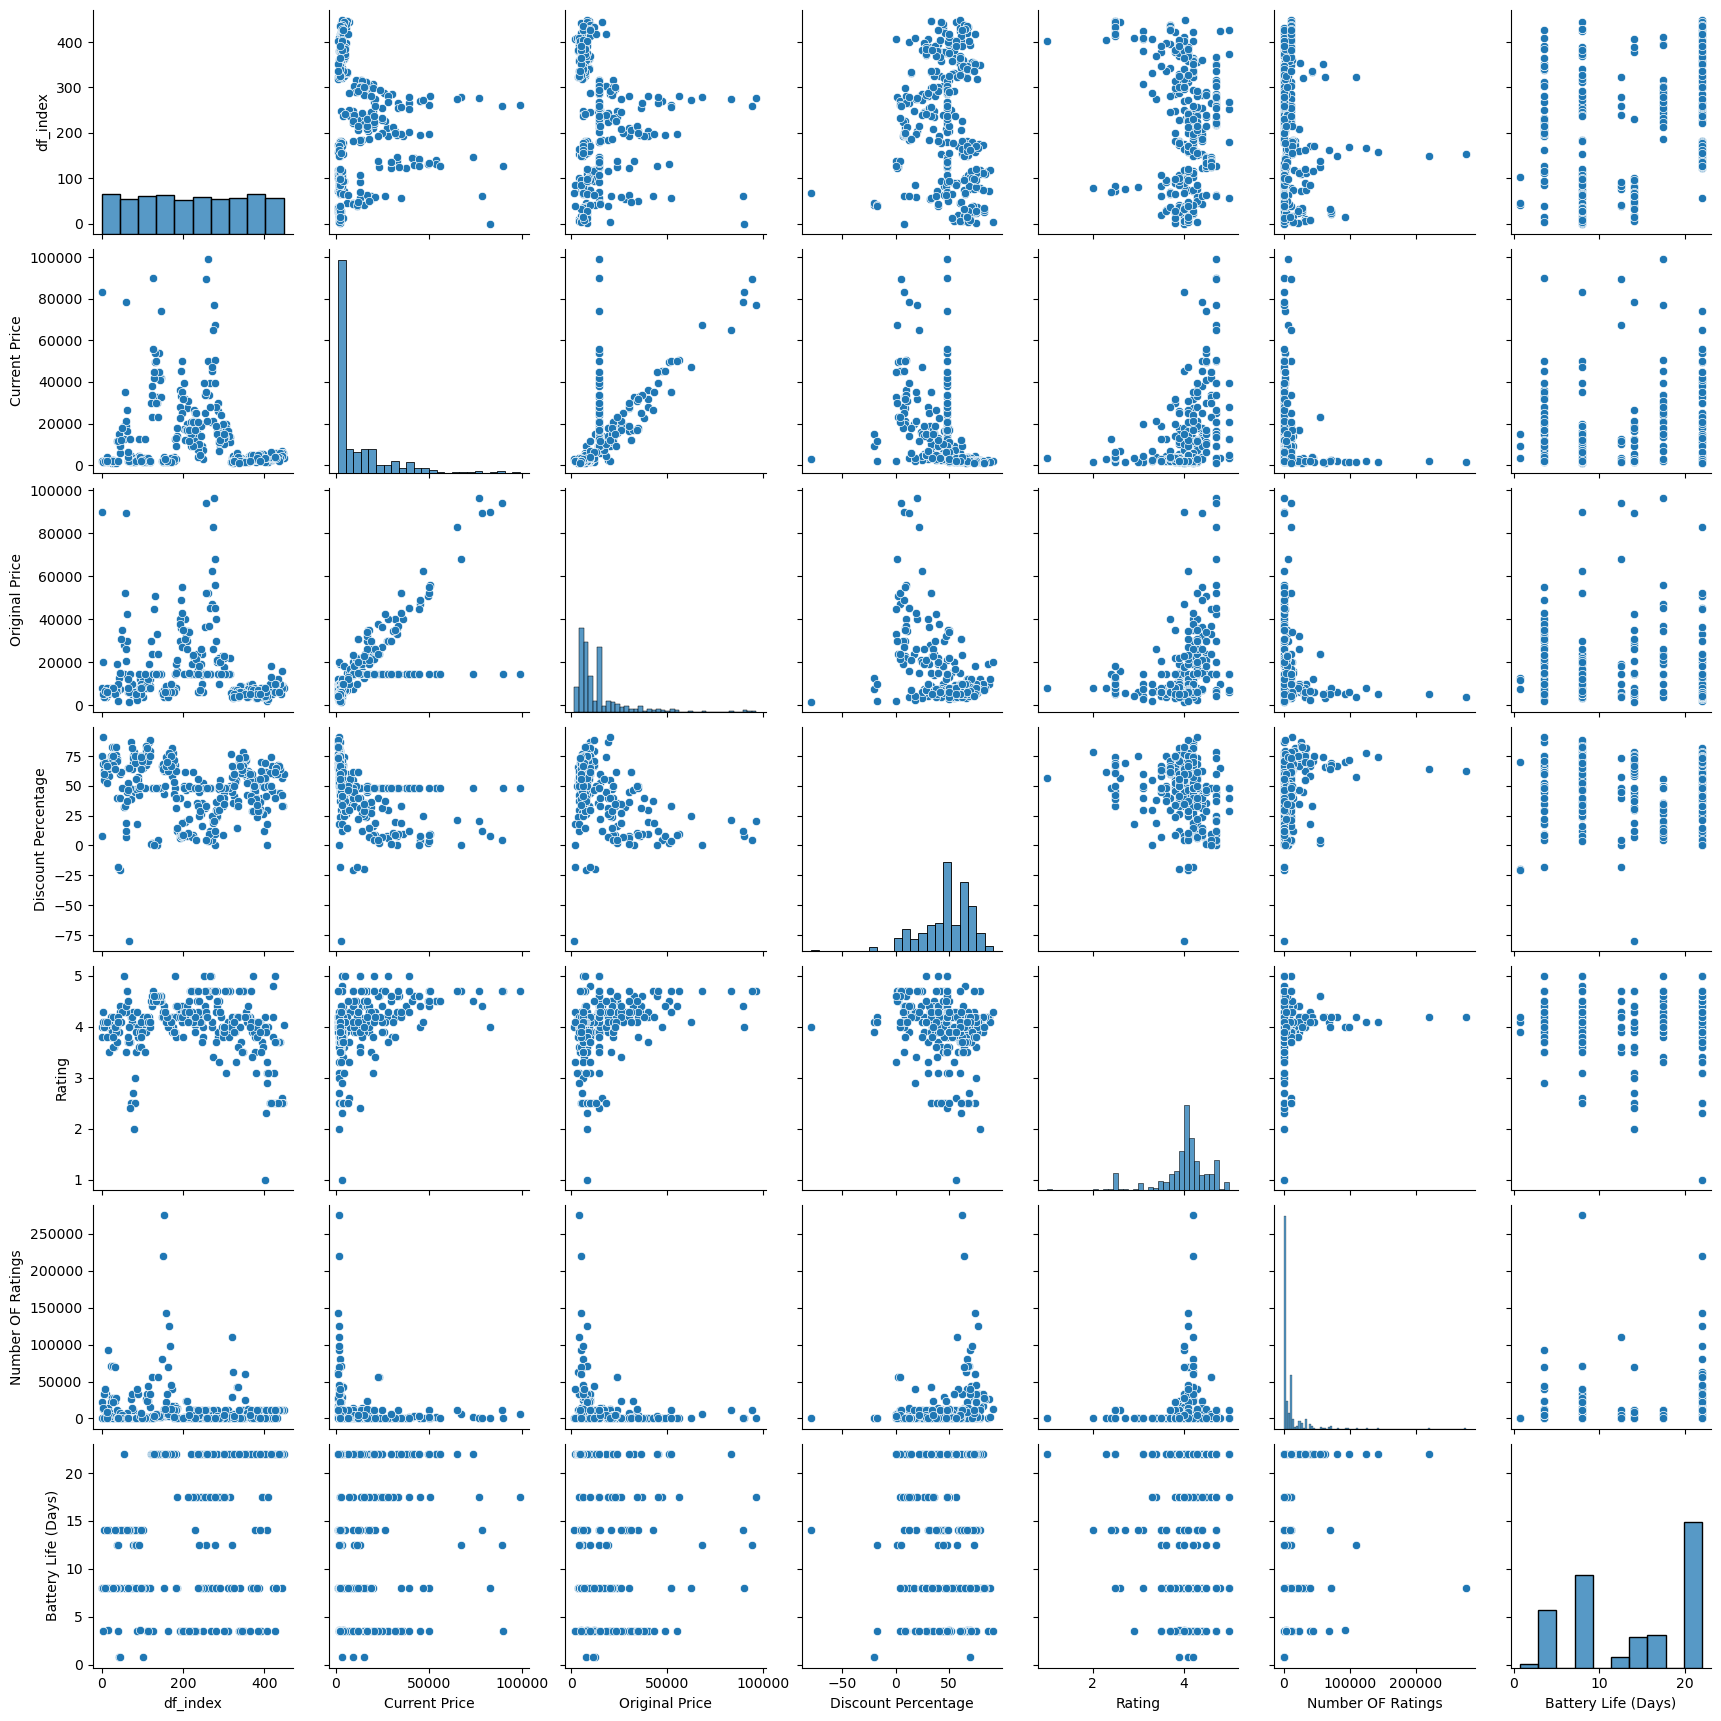

In [1207]:
sb.pairplot(train)

In [1208]:
train.head()

df_index       Brand  Current Price  Original Price  Discount Percentage  \
0       407   zebronics         2949.0          4199.0            29.768993   
1       444  fire-boltt         6999.0         15999.0            56.253516   
2       117  fire-boltt         2499.0         11999.0            79.173264   
3        30        boat         1999.0          7990.0            74.981227   
4       415  fire-boltt         2299.0          5999.0            61.676946   

   Rating  Number OF Ratings       Model Name Dial Shape Strap Color  \
0     3.1          10.000000  LEATHER fit-650       Oval       Black   
1     2.6       11594.726343           bsw020     Circle       Brown   
2     4.1        1990.000000           BSW070        NaN         NaN   
3     3.6         827.000000              NaN        NaN         NaN   
4     2.5          24.000000    NINJA PRO MAX     Square        Blue   

  Strap Material Touchscreen  Battery Life (Days) Bluetooth Display Size  \
0        Leather         Yes            14.077392       Yes   2.7 inches   
1        Silicon         Yes             8.000000       Yes   1.4 inches   
2            NaN         Yes             8.000000       Yes   1.9 inches   
3            NaN         NaN             8.000000       Yes          NaN   
4        Silicon         Yes            22.000000       Yes   1.6 inches   

  Weight  
0    NaN  
1    NaN  
2  75g +  
3  75g +  
4    NaN

In [1211]:
train.drop(columns='df_index',inplace=True)

In [1213]:
train.reset_index()
train.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0   zebronics         2949.0          4199.0            29.768993     3.1   
1  fire-boltt         6999.0         15999.0            56.253516     2.6   
2  fire-boltt         2499.0         11999.0            79.173264     4.1   
3        boat         1999.0          7990.0            74.981227     3.6   
4  fire-boltt         2299.0          5999.0            61.676946     2.5   

   Number OF Ratings       Model Name Dial Shape Strap Color Strap Material  \
0          10.000000  LEATHER fit-650       Oval       Black        Leather   
1       11594.726343           bsw020     Circle       Brown        Silicon   
2        1990.000000           BSW070        NaN         NaN            NaN   
3         827.000000              NaN        NaN         NaN            NaN   
4          24.000000    NINJA PRO MAX     Square        Blue        Silicon   

  Touchscreen  Battery Life (Days) Bluetooth Display Size Weight  
0         Yes            14.077392       Yes   2.7 inches    NaN  
1         Yes             8.000000       Yes   1.4 inches    NaN  
2         Yes             8.000000       Yes   1.9 inches  75g +  
3         NaN             8.000000       Yes          NaN  75g +  
4         Yes            22.000000       Yes   1.6 inches    NaN

In [1215]:
train['Display Size'].isna().sum()

27

In [1217]:
train['Display Size'].value_counts().count()

34

In [1219]:
train['Display Size'].fillna('0.0 inches', inplace=True)

In [1221]:
train['Display Size'] = train['Display Size'].apply(lambda x: float(x.split()[0]))

In [1223]:
train['Display Size'].head()

0    2.7
1    1.4
2    1.9
3    0.0
4    1.6
Name: Display Size, dtype: float64

In [1225]:
train['Display Size'].replace(0.0, np.nan, inplace=True)

In [1227]:

train['Display Size'].isna().sum()

28

In [1229]:
train['Weight'].value_counts()

Weight
20 - 35 g    63
75g +        58
35 - 50 g    45
<= 20 g      30
50 - 75 g    15
Name: count, dtype: int64

In [1231]:
import re
re.findall('\d+', '20 - 35 g ')

['20', '35']

In [1233]:
cal = sum([int(x) for x in re.findall('\d+', '20 - 35 g ')]) / 2
train['Weight'].replace('20 - 35 g', cal, inplace=True)

In [1235]:
cal = sum([int(x) for x in re.findall('\d+', '35 - 50 g')]) / 2
train['Weight'].replace('35 - 50 g', cal, inplace=True)

In [1237]:
cal = sum([int(x) for x in re.findall('\d+', '50 - 75 g')]) / 2
train['Weight'].replace('50 - 75 g', cal, inplace=True)

In [1239]:
train['Weight'].replace('75g +', float(re.findall('\d+', '75g +')[0]), inplace=True)

In [1241]:
train['Weight'].replace('<= 20 g', float(re.findall('\d+', '<= 20 g')[0]), inplace=True)

In [1243]:
train['Weight'].value_counts()

Weight
27.5    63
75.0    58
42.5    45
20.0    30
62.5    15
Name: count, dtype: int64

In [1245]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                360 non-null    object 
 1   Current Price        360 non-null    float64
 2   Original Price       360 non-null    float64
 3   Discount Percentage  360 non-null    float64
 4   Rating               360 non-null    float64
 5   Number OF Ratings    360 non-null    float64
 6   Model Name           330 non-null    object 
 7   Dial Shape           260 non-null    object 
 8   Strap Color          260 non-null    object 
 9   Strap Material       304 non-null    object 
 10  Touchscreen          329 non-null    object 
 11  Battery Life (Days)  360 non-null    float64
 12  Bluetooth            355 non-null    object 
 13  Display Size         332 non-null    float64
 14  Weight               211 non-null    float64
dtypes: float64(8), object(7)
memory usage: 4

In [1247]:
train['Discount Price'] = (train['Original Price'] * (-train['Discount Percentage'])) / 100

In [1249]:
train.drop(['Discount Percentage'], axis=1, inplace=True)

In [1251]:
numerical_col = [feature for feature in train.columns if train[feature].dtype == 'float64']

In [1253]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [1255]:
train[numerical_col].head()

Current Price  Original Price  Rating  Number OF Ratings  \
0         2949.0          4199.0     3.1          10.000000   
1         6999.0         15999.0     2.6       11594.726343   
2         2499.0         11999.0     4.1        1990.000000   
3         1999.0          7990.0     3.6         827.000000   
4         2299.0          5999.0     2.5          24.000000   

   Battery Life (Days)  Display Size  Weight  Discount Price  
0            14.077392           2.7     NaN    -1250.000000  
1             8.000000           1.4     NaN    -8999.999999  
2             8.000000           1.9    75.0    -9500.000000  
3             8.000000           NaN    75.0    -5991.000000  
4            22.000000           1.6     NaN    -3700.000000

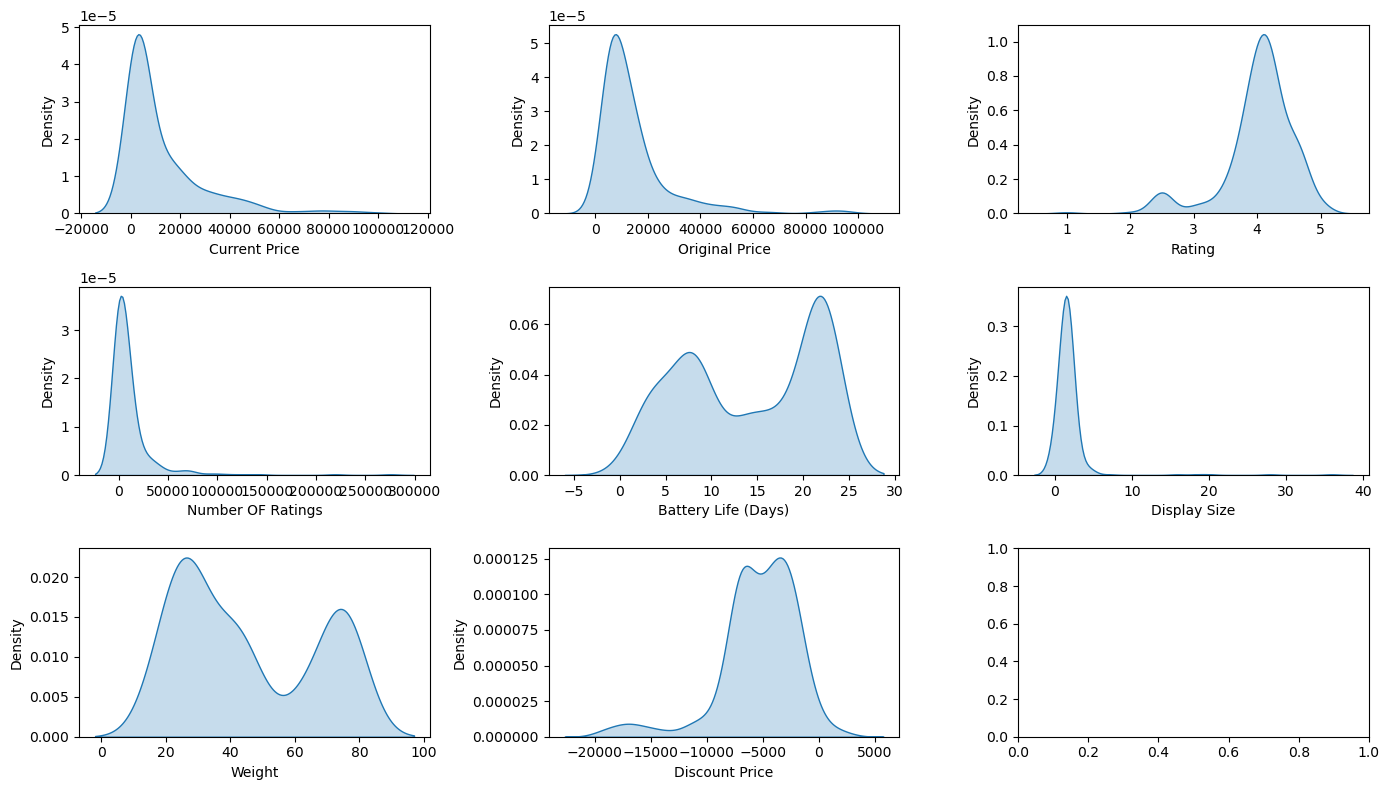

In [1257]:
fig , axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 8))

for i , colum in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sb.kdeplot(data=train[colum], ax=ax, fill=True)

fig.tight_layout()
plt.show()

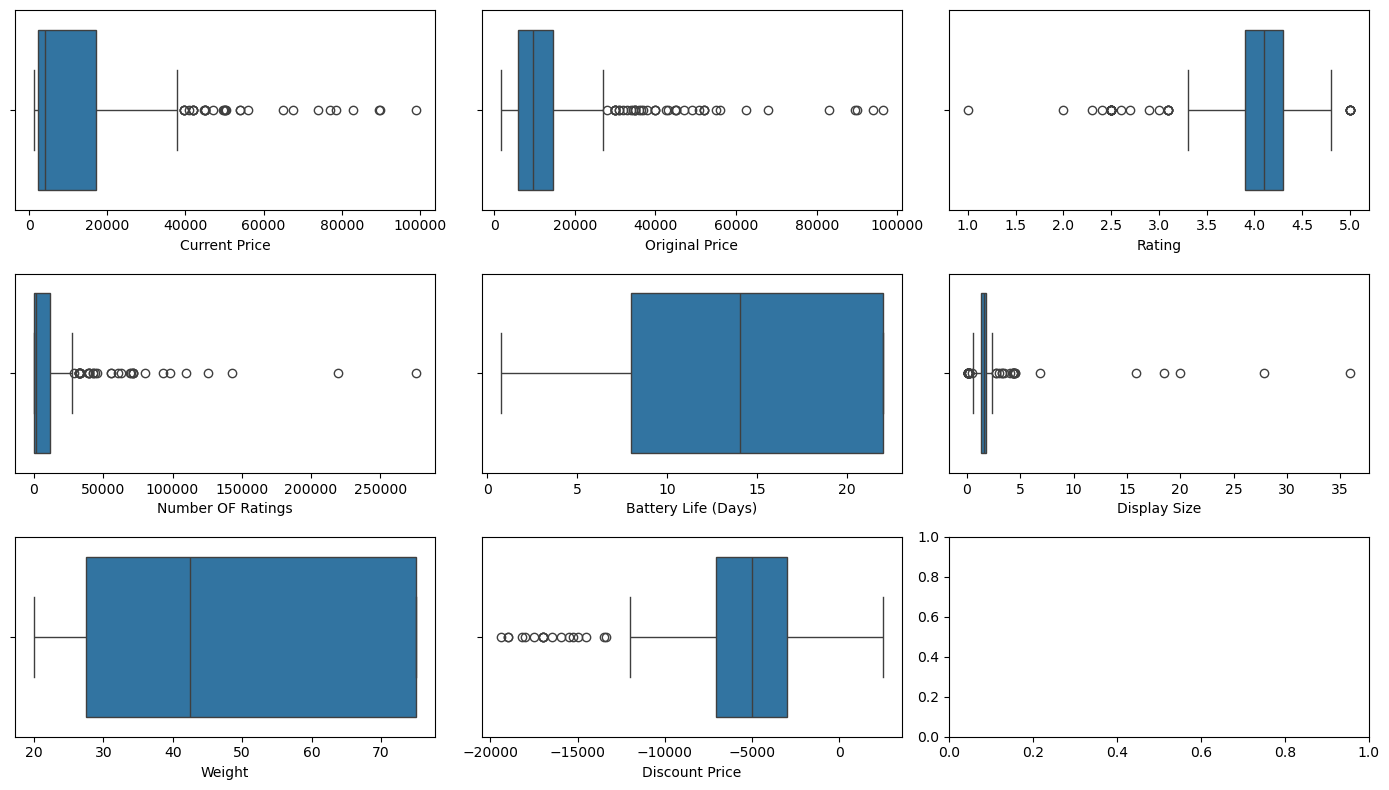

In [1258]:
fig , axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 8))

for i , colum in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sb.boxplot(x=train[colum], ax=ax)

fig.tight_layout()
plt.show()

In [1261]:
def remove_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR    
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] > lower_bound) & (data[col] < upper_bound)]

In [1263]:
train.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [1265]:
import_col = ['Current Price', 'Original Price', 'Rating', 'Number OF Ratings', 'Display Size']

In [1267]:
train[import_col].head()

Current Price  Original Price  Rating  Number OF Ratings  Display Size
0         2949.0          4199.0     3.1          10.000000           2.7
1         6999.0         15999.0     2.6       11594.726343           1.4
2         2499.0         11999.0     4.1        1990.000000           1.9
3         1999.0          7990.0     3.6         827.000000           NaN
4         2299.0          5999.0     2.5          24.000000           1.6

In [1269]:
numerical_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [1271]:
for col in import_col:
    train = remove_outliers_IQR(train, col)

In [1273]:
for col in import_col:
    train[col].fillna(train[col].median(),inplace=True)

In [1275]:
train.shape

(172, 15)

In [1277]:
train.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             50
Strap Color            50
Strap Material         25
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                 71
Discount Price          0
dtype: int64

In [1279]:
from sklearn.preprocessing import MinMaxScaler

In [1281]:
scaler = MinMaxScaler()

In [1283]:
data= scaler.fit_transform(train[numerical_col[:-1]])

In [1285]:
data = pd.DataFrame(data, columns=numerical_col[:-1])

In [1287]:
data.head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.035421        0.419833  0.571429           0.071557   
1       0.035421        0.212631  0.714286           0.141926   
2       0.062669        0.171191  0.642857           0.064175   
3       0.457644        0.527546  0.428571           0.001549   
4       0.025258        0.171191  0.285714           0.000540   

   Battery Life (Days)  Display Size    Weight  
0             0.341176      0.764706  1.000000  
1             1.000000      0.764706       NaN  
2             1.000000      0.705882  1.000000  
3             0.788235      0.352941       NaN  
4             0.341176      0.764706  0.136364

In [1289]:
data.isna().sum()

Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Display Size            0
Weight                 71
dtype: int64

In [1291]:
train.drop(numerical_col[:-1], axis=1, inplace=True)

In [1293]:
train.head()

Brand                                         Model Name Dial Shape  \
2   fire-boltt                                             BSW070        NaN   
5        noise  ColorFit Loop Advanced BT Calling with 1.85" d...     Square   
6         dizo  Watch D Talk 1.8 display with calling&7 day ba...  Rectangle   
9       fossil                                   Sport Smartwatch     Circle   
12        dizo                                                NaN        NaN   

   Strap Color Strap Material Touchscreen Bluetooth  Discount Price  
2          NaN            NaN         Yes       Yes    -9500.000000  
5         Grey        Silicon         Yes       Yes    -4500.000000  
6         Grey        Silicon         Yes       Yes    -2500.000000  
9   Multicolor        Silicon         Yes       Yes    -7041.720251  
12         NaN            NaN         Yes       Yes    -3873.000000

In [1295]:
train.isna().sum()

Brand              0
Model Name         9
Dial Shape        50
Strap Color       50
Strap Material    25
Touchscreen        6
Bluetooth          0
Discount Price     0
dtype: int64

In [1297]:
pd.concat([train.reset_index(), data], axis=1).shape

(172, 16)

In [1299]:
train = pd.concat([train.reset_index(), data], axis=1)

In [1301]:
train.isna().sum()

index                   0
Brand                   0
Model Name              9
Dial Shape             50
Strap Color            50
Strap Material         25
Touchscreen             6
Bluetooth               0
Discount Price          0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Display Size            0
Weight                 71
dtype: int64

In [1303]:
train[numerical_col]

Current Price  Original Price    Rating  Number OF Ratings  \
0         0.035421        0.419833  0.571429           0.071557   
1         0.035421        0.212631  0.714286           0.141926   
2         0.062669        0.171191  0.642857           0.064175   
3         0.457644        0.527546  0.428571           0.001549   
4         0.025258        0.171191  0.285714           0.000540   
..             ...             ...       ...                ...   
167       0.021798        0.171191  0.571429           0.326923   
168       0.049045        0.171191  0.714286           0.471946   
169       0.027247        0.000000  0.571429           0.006410   
170       0.286096        0.544155  0.714286           0.143907   
171       0.000000        0.109030  1.000000           0.417449   

     Battery Life (Days)  Display Size    Weight  Discount Price  
0               0.341176      0.764706  1.000000    -9500.000000  
1               1.000000      0.764706       NaN    -4500.000000  
2               1.000000      0.705882  1.000000    -2500.000000  
3               0.788235      0.352941       NaN    -7041.720251  
4               0.341176      0.764706  0.136364    -3873.000000  
..                   ...           ...       ...             ...  
167             0.627171      0.705882  0.409091    -4000.000000  
168             1.000000      0.647059       NaN    -3000.000000  
169             0.129412      0.529412  0.000000      331.000000  
170             0.129412      0.411765  0.136364    -3299.999999  
171             1.000000      0.705882  0.136364    -3300.000000  

[172 rows x 8 columns]

In [1305]:
categorical_col = [feature for feature in train.columns if train[feature].dtype == 'object']

In [1307]:
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [1309]:
train[categorical_col].head()

Brand                                         Model Name Dial Shape  \
0  fire-boltt                                             BSW070        NaN   
1       noise  ColorFit Loop Advanced BT Calling with 1.85" d...     Square   
2        dizo  Watch D Talk 1.8 display with calling&7 day ba...  Rectangle   
3      fossil                                   Sport Smartwatch     Circle   
4        dizo                                                NaN        NaN   

  Strap Color Strap Material Touchscreen Bluetooth  
0         NaN            NaN         Yes       Yes  
1        Grey        Silicon         Yes       Yes  
2        Grey        Silicon         Yes       Yes  
3  Multicolor        Silicon         Yes       Yes  
4         NaN            NaN         Yes       Yes

In [1311]:
train['Bluetooth'].value_counts()

Bluetooth
Yes    171
No       1
Name: count, dtype: int64

In [1313]:
categorical_col.remove('Bluetooth')

In [1315]:
from scipy.stats import f_oneway
    

In [1317]:
for col in categorical_col:
    CategoryGroupLists = train.groupby(col)['Discount Price'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(col, ': ', 'P-Value for anova is : ', AnovaResults[1])

Brand :  P-Value for anova is :  5.424887522169395e-15
Model Name :  P-Value for anova is :  0.0023195961317059805
Dial Shape :  P-Value for anova is :  0.006812236594288524
Strap Color :  P-Value for anova is :  0.08072269568758254
Strap Material :  P-Value for anova is :  0.00040771346185620484
Touchscreen :  P-Value for anova is :  0.15204741948556225


In [1319]:
imp_col = ['Brand', 'Model Name', 'Dial Shape', 'Strap Material','Strap Color']

In [1321]:
train[imp_col].head()

Brand                                         Model Name Dial Shape  \
0  fire-boltt                                             BSW070        NaN   
1       noise  ColorFit Loop Advanced BT Calling with 1.85" d...     Square   
2        dizo  Watch D Talk 1.8 display with calling&7 day ba...  Rectangle   
3      fossil                                   Sport Smartwatch     Circle   
4        dizo                                                NaN        NaN   

  Strap Material Strap Color  
0            NaN         NaN  
1        Silicon        Grey  
2        Silicon        Grey  
3        Silicon  Multicolor  
4            NaN         NaN

In [1323]:
train[imp_col].isna().sum()

Brand              0
Model Name         9
Dial Shape        50
Strap Material    25
Strap Color       50
dtype: int64

In [1325]:
for col in imp_col[1:]:
    train[col].fillna('other', inplace=True)

In [1327]:
brand = pd.get_dummies(train['Brand'], drop_first=True)
model_name  = pd.get_dummies(train['Model Name']).drop(['other'], axis=1)
dial_shape = pd.get_dummies(train['Dial Shape']).drop(['other'], axis=1)
strap_material = pd.get_dummies(train['Strap Material']).drop(['other'], axis=1)

In [1333]:
train['Strap Color'].fillna('Unknown', inplace=True)

In [1337]:
train['Strap Color'].head(20)

0          other
1           Grey
2           Grey
3     Multicolor
4          other
5           Blue
6          other
7          other
8          other
9          Black
10         Black
11         Black
12         other
13         other
14         Black
15         Black
16         other
17         Black
18          Gold
19           Red
Name: Strap Color, dtype: object

In [1339]:
strap_color = pd.get_dummies(train['Strap Color']).drop(['other'],axis=1)

In [1341]:
imp_df = pd.concat([brand, model_name, dial_shape, strap_material,strap_color], axis=1)

In [1343]:
imp_df.head()

ambrane  apple   boat  crossbeats   dizo  fire-boltt  fitbit  fossil  \
0    False  False  False       False  False        True   False   False   
1    False  False  False       False  False       False   False   False   
2    False  False  False       False   True       False   False   False   
3    False  False  False       False  False       False   False    True   
4    False  False  False       False   True       False   False   False   

   garmin  gizmore  ...  Multicolor  Orange   Pink  Purple    Red  Rose Gold  \
0   False    False  ...       False   False  False   False  False      False   
1   False    False  ...       False   False  False   False  False      False   
2   False    False  ...       False   False  False   False  False      False   
3   False    False  ...        True   False  False   False  False      False   
4   False    False  ...       False   False  False   False  False      False   

   Silver  Starlight Sport  White  White Platinum  
0   False            False  False           False  
1   False            False  False           False  
2   False            False  False           False  
3   False            False  False           False  
4   False            False  False           False  

[5 rows x 209 columns]

In [1345]:
train[numerical_col].isna().sum()

Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Display Size            0
Weight                 71
Discount Price          0
dtype: int64

In [1347]:
train['Weight'].fillna(train['Weight'].mean(),inplace=True)

In [1349]:
train[numerical_col].isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
Discount Price         0
dtype: int64

In [1353]:
train.isna().sum()

index                  0
Brand                  0
Model Name             0
Dial Shape             0
Strap Color            0
Strap Material         0
Touchscreen            6
Bluetooth              0
Discount Price         0
Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
dtype: int64

In [1357]:
train.drop(categorical_col[:-1], axis=1, inplace=True)
train = pd.concat([train.reset_index(), imp_df], axis=1)
train.drop(['BlueTooth', 'TouchScreen'], inplace=True)


KeyError: "['Brand', 'Model Name', 'Dial Shape', 'Strap Color', 'Strap Material'] not found in axis"

In [1359]:
train.to_csv('./desktop/clean_final.csv', index=False)